In [336]:
# Import data
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

resturant_df = pd.read_excel(io='Food Orders - Shared-1.xlsx',sheet_name='SwiggyTo')

print(str.format('The data has the following characteristics: \n{0}', resturant_df.describe()))
print(str.format('The shape of the data is {0}', resturant_df.shape))
resturant_df.head()

The data has the following characteristics: 
               ID  Provider   Distance   Discount  Paid amount        Tip  \
count   58.000000       0.0  59.000000  24.000000          1.0  24.000000   
mean    52.655172       NaN   3.593220  33.750000          5.0   4.875000   
std    101.657587       NaN   1.340595  18.371173          NaN   0.612372   
min      1.000000       NaN  -2.000000 -25.000000          5.0   2.000000   
25%     13.250000       NaN   3.000000  25.000000          5.0   5.000000   
50%     27.500000       NaN   3.000000  25.000000          5.0   5.000000   
75%     41.750000       NaN   4.000000  50.000000          5.0   5.000000   
max    467.000000       NaN   6.000000  50.000000          5.0   5.000000   

          Rating  
count  57.000000  
mean    2.403509  
std     1.771396  
min     0.000000  
25%     1.000000  
50%     3.000000  
75%     4.000000  
max     5.000000  
The shape of the data is (60, 21)


,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


In [337]:
# Methods for plotting graphs

def plot_simple_bar(data: DataFrame, x_col, y_col, x_dscr, y_dscr,label, title, dim_x, dim_y):
    plt.figure(num=None, figsize=(dim_x, dim_y), dpi=100)
    plt.bar(data[x_col],data[y_col],label=label)
    plt.legend(loc='best',fancybox=True, shadow=True)
    plt.ylabel(y_dscr)
    plt.xlabel(x_dscr)
    plt.title(title)
    plt.show()

### Check for Null and NaN 

In [338]:
# Check for NaN & null values
print(str.format('Following null values are present: \n{0}',resturant_df.isnull().sum()))
print('*******************************************************************')
print(str.format('Following NaN values are present: \n{0}',resturant_df.isna().sum()))

resturant_bad_data = resturant_df[((resturant_df.isnull() == False) & (resturant_df.isna() == False))]
print(str.format('There are {0} instances of bad data in out data set which comprises of {1}% of our data set.', len(resturant_bad_data.index), (len(resturant_bad_data.index)/len(resturant_df.index))* 100))


Following null values are present: 
ID                    2
Provider             60
DateTime              0
Distance              1
Status                1
Cost                  0
PromoCode            24
Delivery Time         1
Discount             36
Paid amount          59
Payment mode          1
Delivery charges      0
Surge charges        32
Packaging charges     0
ST                    0
Tip                  36
PureVeg               1
Items                 1
Membership            1
Type                  1
Rating                3
dtype: int64
*******************************************************************
Following NaN values are present: 
ID                    2
Provider             60
DateTime              0
Distance              1
Status                1
Cost                  0
PromoCode            24
Delivery Time         1
Discount             36
Paid amount          59
Payment mode          1
Delivery charges      0
Surge charges        32
Packaging charges     0
ST      

#### We can see that almost every row of our data set has some form of bad or missing data. Hence we can not just drop those rows containing bad data. Columns *Provider* and *Paid Amount* have the highest instances of null values. 

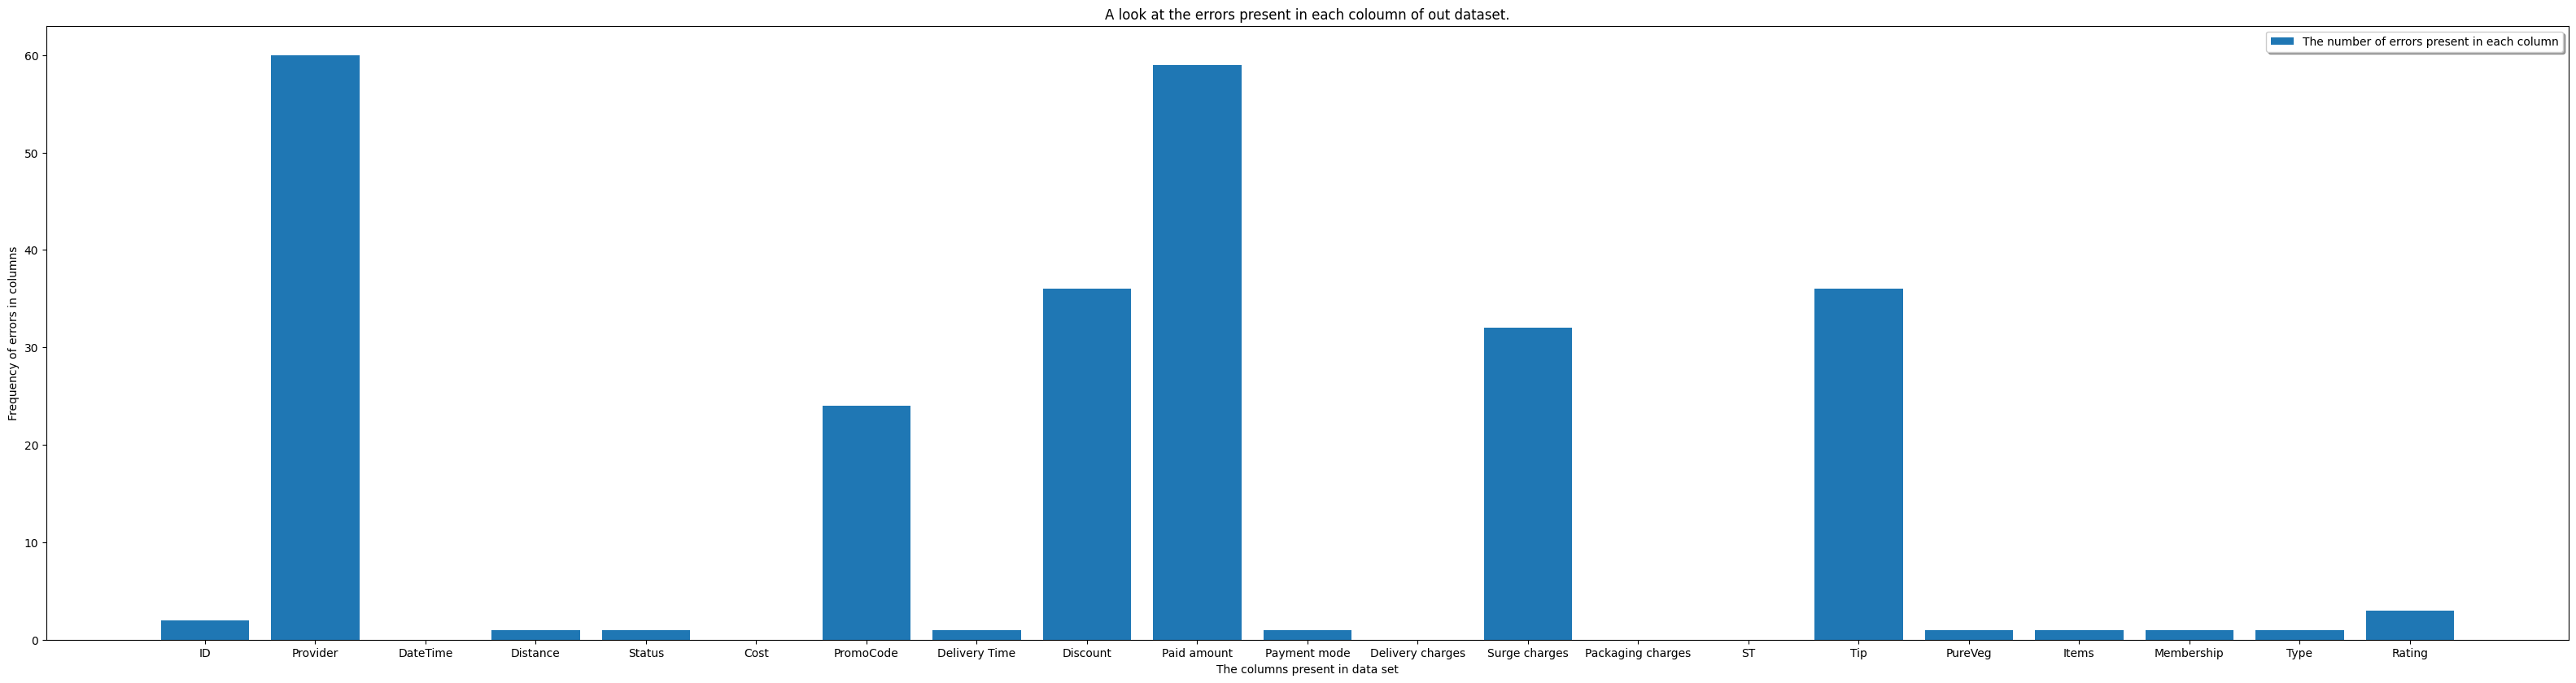

The columns that can be dropped are ['Provider' 'Paid amount'].
The shape of the data is (60, 19)


In [339]:
# Total records in data set 
total_records = len(resturant_df.index)
tolerance = total_records - (total_records * 0.1)

# Histogram analysis of number of missing values column wise
bad_data = pd.DataFrame(data=resturant_df.isna().sum(), columns= ['Errors'])
bad_data = bad_data.assign(ColumnName=bad_data.index)
bad_data.head()

plot_simple_bar(bad_data,'ColumnName','Errors','The columns present in data set','Frequency of errors in columns','The number of errors present in each column','A look at the errors present in each coloumn of out dataset.',40,10)
print(str.format('The columns that can be dropped are {0}.',bad_data[(bad_data['Errors'] > tolerance)]['ColumnName'].values))
resturant_df = resturant_df.drop(labels=bad_data[(bad_data['Errors'] > tolerance)]['ColumnName'].values, axis=1)
print(str.format('The shape of the data is {0}', resturant_df.shape))

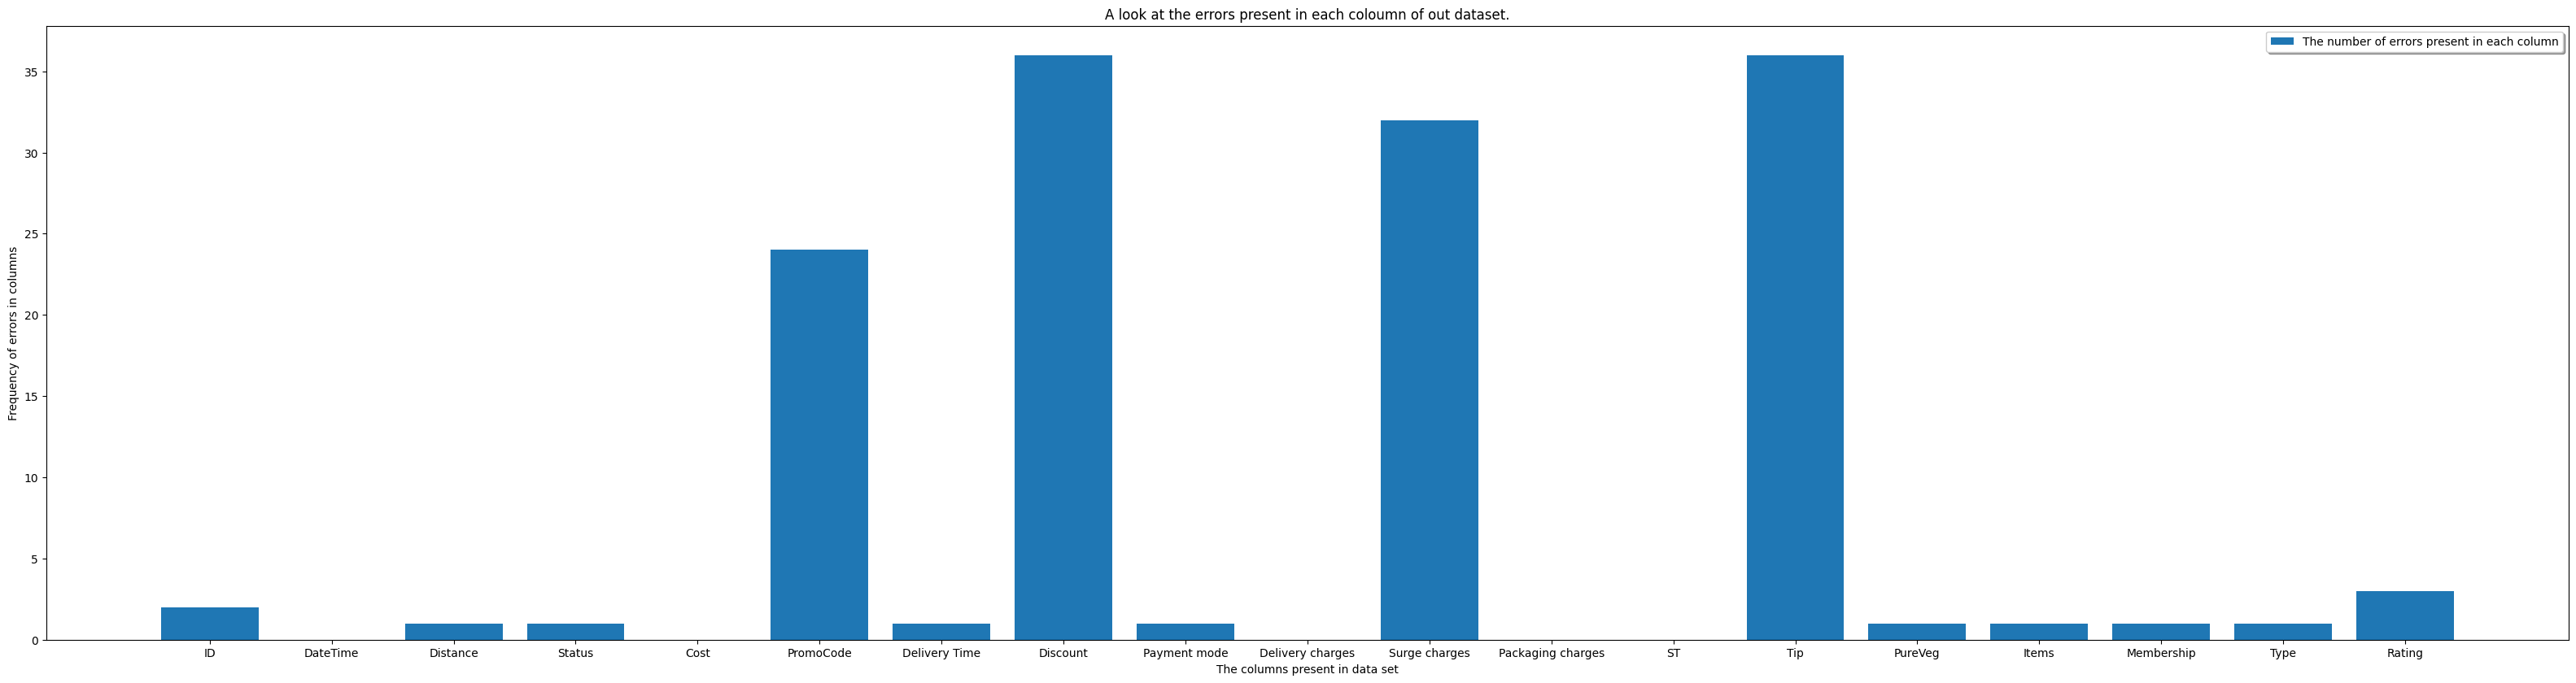

The columns that can be dropped are [].
The shape of the data is (60, 19)


In [340]:
# Histogram analysis of number of null values column wise
bad_data = pd.DataFrame(data=resturant_df.isnull().sum(), columns= ['Errors'])
bad_data = bad_data.assign(ColumnName=bad_data.index)
bad_data.head()

plot_simple_bar(bad_data,'ColumnName','Errors','The columns present in data set','Frequency of errors in columns','The number of errors present in each column','A look at the errors present in each coloumn of out dataset.',40,10)
print(str.format('The columns that can be dropped are {0}.',bad_data[(bad_data['Errors'] > tolerance)]['ColumnName'].values))
resturant_df = resturant_df.drop(labels=bad_data[(bad_data['Errors']  > tolerance)]['ColumnName'].values, axis=1)
print(str.format('The shape of the data is {0}', resturant_df.shape))

In [341]:
# Visualize the data

print('The reaturant data is : \n')
resturant_df

The reaturant data is : 



,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,COD,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,WALLET,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,COD,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
5,5.0,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
6,6.0,1-July-2020 7.38 PM,3.0,Delivered,280,PRO,1-July-2020 8.38 PM,50.0,COD,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
7,7.0,1-July-2020 9.38 AM,3.0,Delivered,120,BF,1-July-2020 9.58 AM,NaN,WALLET,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
8,8.0,1-July-2020 8.00 PM,6.0,Cancelled,230,PRO,1-July-2020 8.30 PM,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
9,9.0,1-July-2020 7.30 PM,4.0,Delivered,450,PRO,1-July-2020 9.05 PM,NaN,COD,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0


In [342]:
print(str.format('Going through the whole data set we can conclude that any row which does not have a valid value (Delivered/Cancelled) can be ignored because they will not play a significant part in prediction.'))
print(str.format("The data at row {0} does not have a valid value for Column Status. Hence we can drop that record.", resturant_df[resturant_df['Status'].isna() == True].index[0]))

# Dropping bad record
resturant_df = resturant_df.drop(resturant_df[resturant_df['Status'].isna() == True].index[0])

Going through the whole data set we can conclude that any row which does not have a valid value (Delivered/Cancelled) can be ignored because they will not play a significant part in prediction.
The data at row 23 does not have a valid value for Column Status. Hence we can drop that record.


In [343]:
print('The reaturant data is : \n')
resturant_df

The reaturant data is : 



,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,COD,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,WALLET,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,COD,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
5,5.0,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
6,6.0,1-July-2020 7.38 PM,3.0,Delivered,280,PRO,1-July-2020 8.38 PM,50.0,COD,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
7,7.0,1-July-2020 9.38 AM,3.0,Delivered,120,BF,1-July-2020 9.58 AM,NaN,WALLET,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
8,8.0,1-July-2020 8.00 PM,6.0,Cancelled,230,PRO,1-July-2020 8.30 PM,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
9,9.0,1-July-2020 7.30 PM,4.0,Delivered,450,PRO,1-July-2020 9.05 PM,NaN,COD,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0


In [344]:
# List out columns containg NaN values
print(str.format('The columns have n NaN values: \n{0}',resturant_df.isna().sum()))

print(str.format('We can see that columns ID, PromoCode, Discount, Surge charges, Tip and Rating have NaN values present in them. All columns other than PromoCode are numeric in nature and their NaNs can be replaced by 0. Except in case of ID which can be dropped as it will play no role in predictrion. The column ST can also be dropped as it has the same value of 5 across all records and will not contribute significantly towards prediction.'))

# Drop ID column 
resturant_df = resturant_df.drop(labels=['ID','ST'], axis=1)

# Replace NaN with 0 
resturant_df[['Discount','Surge charges','Tip','Rating']] = resturant_df[['Discount','Surge charges','Tip','Rating']].fillna(0)

# Replace NaN in PromoCode with 'None'
resturant_df['PromoCode'] = resturant_df['PromoCode'].fillna('None')

print(str.format('The columns have n NaN values: \n{0}',resturant_df.isna().sum()))

resturant_df.head(60)

The columns have n NaN values: 
ID                    1
DateTime              0
Distance              0
Status                0
Cost                  0
PromoCode            24
Delivery Time         0
Discount             36
Payment mode          0
Delivery charges      0
Surge charges        32
Packaging charges     0
ST                    0
Tip                  36
PureVeg               0
Items                 0
Membership            0
Type                  0
Rating                2
dtype: int64
We can see that columns ID, PromoCode, Discount, Surge charges, Tip and Rating have NaN values present in them. All columns other than PromoCode are numeric in nature and their NaNs can be replaced by 0. Except in case of ID which can be dropped as it will play no role in predictrion. The column ST can also be dropped as it has the same value of 5 across all records and will not contribute significantly towards prediction.
The columns have n NaN values: 
DateTime             0
Distance         

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,Tip,PureVeg,Items,Membership,Type,Rating
0,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,COD,20,0,10,0.0,Y,PANEER;ROTI,BING,VEG,2.0
1,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,0.0,WALLET,20,0,10,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,CARD,25,10,10,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,0.0,COD,25,10,10,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,0.0,COD,20,0,10,0.0,Y,DAL;ROTI,NO,VEG,1.0
5,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,0.0,COD,20,0,10,0.0,Y,DAL;ROTI,NO,VEG,1.0
6,1-July-2020 7.38 PM,3.0,Delivered,280,PRO,1-July-2020 8.38 PM,50.0,COD,20,0,10,0.0,Y,PANEER;ROTI,BING,VEG,2.0
7,1-July-2020 9.38 AM,3.0,Delivered,120,BF,1-July-2020 9.58 AM,0.0,WALLET,20,0,10,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
8,1-July-2020 8.00 PM,6.0,Cancelled,230,PRO,1-July-2020 8.30 PM,25.0,CARD,25,10,10,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
9,1-July-2020 7.30 PM,4.0,Delivered,450,PRO,1-July-2020 9.05 PM,0.0,COD,25,10,10,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0


### Items is a categorical column containing ordinal data. The items in this column have just enough information to distinguish between each object. This column accepts colon seperated values. 

In [345]:
# Find all unique values in Categorical columns
import re 

unique_items = []
for row in resturant_df['Items']:
    for item in re.split('[;]', row):
        unique_items.append(item)

set_unique_items = set(unique_items)
print(str.format('The Items column consists of a combination of following values: \n{0}\n', set_unique_items))
set_unique_status = set(resturant_df['Status'])
print(str.format('The Status column consists of a combination of following values: \n{0}\n', set_unique_status))
set_unique_promocode = set(resturant_df['PromoCode'])
print(str.format('The PromoCode column consists of a combination of following values: \n{0}\n', set_unique_promocode))
set_unique_paymentmode = set(resturant_df['Payment mode'])
print(str.format('The Payment mode column consists of a combination of following values: \n{0}', set_unique_paymentmode))

The Items column consists of a combination of following values: 
{'PANEER', 'CHICKEN', 'RICE', 'DAL', 'BIRYANI', 'MIXVEG', 'ROTI'}

The Status column consists of a combination of following values: 
{'Delivered', 'Cancelled'}

The PromoCode column consists of a combination of following values: 
{'None', 'PRO', 'BF'}

The Payment mode column consists of a combination of following values: 
{'COD', 'CARD', 'WALLET'}


### The columns Status, PromoCode and Payment mode have 2, 3 and 3 unique *Ordinal* values respectively, these columns can be converted to numeric form using 0, 1 and 2 to represent different values.

In [346]:
# Convert from categorical to discrete data
# Staus
print(str.format('The Status column has 2 unique values Delivered and Cancelled. They are encoded with 1 and 0 respectively.'))
resturant_df['Status'] = resturant_df['Status'].replace('Delivered', 1).replace('Cancelled', 0)

# PromoCode
print(str.format('The PromoCode column has 3 unique values None, PRO and BF. They are encoded with 0, 1 and 2 respectively.'))
resturant_df['PromoCode'] = resturant_df['PromoCode'].replace('None', 0).replace('PRO', 1).replace('BF', 2)

# Payment mode 
print(str.format('The Payment mode column has 3 unique values COD, CARD and WALLET. They are encoded with 0, 1 and 2 respectively.'))
resturant_df['Payment mode'] = resturant_df['Payment mode'].replace('COD', 0).replace('CARD', 1).replace('WALLET', 2)

resturant_df.head(10)

The Status column has 2 unique values Delivered and Cancelled. They are encoded with 1 and 0 respectively.
The PromoCode column has 3 unique values None, PRO and BF. They are encoded with 0, 1 and 2 respectively.
The Payment mode column has 3 unique values COD, CARD and WALLET. They are encoded with 0, 1 and 2 respectively.


,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,Tip,PureVeg,Items,Membership,Type,Rating
0,1-July-2020 8.38 PM,3.0,1,300,1,1-July-2020 9.38 PM,50.0,0,20,0,10,0.0,Y,PANEER;ROTI,BING,VEG,2.0
1,1-July-2020 8.38 AM,3.0,1,100,2,1-July-2020 8.58 AM,0.0,2,20,0,10,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,1-July-2020 9.00 PM,6.0,0,250,1,1-July-2020 9.30 PM,25.0,1,25,10,10,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,1-July-2020 7.30 PM,4.0,1,550,1,1-July-2020 9.05 PM,0.0,0,25,10,10,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,1-July-2020 8.38 PM,3.0,0,125,1,1-July-2020 7.38 PM,0.0,0,20,0,10,0.0,Y,DAL;ROTI,NO,VEG,1.0
5,1-July-2020 8.38 PM,3.0,0,125,1,1-July-2020 8.38 PM,0.0,0,20,0,10,0.0,Y,DAL;ROTI,NO,VEG,1.0
6,1-July-2020 7.38 PM,3.0,1,280,1,1-July-2020 8.38 PM,50.0,0,20,0,10,0.0,Y,PANEER;ROTI,BING,VEG,2.0
7,1-July-2020 9.38 AM,3.0,1,120,2,1-July-2020 9.58 AM,0.0,2,20,0,10,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
8,1-July-2020 8.00 PM,6.0,0,230,1,1-July-2020 8.30 PM,25.0,1,25,10,10,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
9,1-July-2020 7.30 PM,4.0,1,450,1,1-July-2020 9.05 PM,0.0,0,25,10,10,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0


In [331]:
# Perform Binarization on Items column to extract 7 columns from it
# One Hot Encoding tecnique is used 
resturant_df_binarized = resturant_df.assign(Paneer=resturant_df['Items'].str.contains('PANEER') == True).replace(True,1).replace(False,0)
resturant_df_binarized = resturant_df_binarized.assign(Chicken=resturant_df['Items'].str.contains('CHICKEN') == True).replace(True,1).replace(False,0)
resturant_df_binarized = resturant_df_binarized.assign(Roti=resturant_df['Items'].str.contains('ROTI') == True).replace(True,1).replace(False,0)
resturant_df_binarized = resturant_df_binarized.assign(Rice=resturant_df['Items'].str.contains('RICE') == True).replace(True,1).replace(False,0)
resturant_df_binarized = resturant_df_binarized.assign(Dal=resturant_df['Items'].str.contains('DAL') == True).replace(True,1).replace(False,0)
resturant_df_binarized = resturant_df_binarized.assign(Biryani=resturant_df['Items'].str.contains('BIRYANI') == True).replace(True,1).replace(False,0)
resturant_df_binarized = resturant_df_binarized.assign(MixVeg=resturant_df['Items'].str.contains('MIXVEG') == True).replace(True,1).replace(False,0)

# Drop the Items column 
resturant_df_binarized = resturant_df_binarized.drop(labels=['Items'], axis=1)

resturant_df_binarized.head()

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,...,Membership,Type,Rating,Paneer,Chicken,Roti,Rice,Dal,Biryani,MixVeg
0,1-July-2020 8.38 PM,3.0,1,300,1,1-July-2020 9.38 PM,50.0,0,20,0,...,BING,VEG,2.0,1,0,1,0,0,0,0
1,1-July-2020 8.38 AM,3.0,1,100,2,1-July-2020 8.58 AM,0.0,2,20,0,...,BONG,MIX,4.0,0,1,1,0,1,0,0
2,1-July-2020 9.00 PM,6.0,0,250,1,1-July-2020 9.30 PM,25.0,1,25,10,...,BING,VEG,0.0,0,0,0,1,0,0,1
3,1-July-2020 7.30 PM,4.0,1,550,1,1-July-2020 9.05 PM,0.0,0,25,10,...,NO,MIX,1.0,0,1,0,0,0,1,0
4,1-July-2020 8.38 PM,3.0,0,125,1,1-July-2020 7.38 PM,0.0,0,20,0,...,NO,VEG,1.0,0,0,1,0,1,0,0


In [332]:
# New feature TotalCostOfOrder can be created from Cost - Discount + Surge charges + Delivery charges which will provide infor about the total cost of the order 
resturant_df_binarized = resturant_df_binarized.assign(TotalCostOfOrder=(resturant_df_binarized['Cost'] - resturant_df_binarized['Discount'] + resturant_df_binarized['Surge charges'] + resturant_df_binarized['Delivery charges']))

resturant_df_binarized.head()

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,...,Type,Rating,Paneer,Chicken,Roti,Rice,Dal,Biryani,MixVeg,TotalCostOfOrder
0,1-July-2020 8.38 PM,3.0,1,300,1,1-July-2020 9.38 PM,50.0,0,20,0,...,VEG,2.0,1,0,1,0,0,0,0,270.0
1,1-July-2020 8.38 AM,3.0,1,100,2,1-July-2020 8.58 AM,0.0,2,20,0,...,MIX,4.0,0,1,1,0,1,0,0,120.0
2,1-July-2020 9.00 PM,6.0,0,250,1,1-July-2020 9.30 PM,25.0,1,25,10,...,VEG,0.0,0,0,0,1,0,0,1,260.0
3,1-July-2020 7.30 PM,4.0,1,550,1,1-July-2020 9.05 PM,0.0,0,25,10,...,MIX,1.0,0,1,0,0,0,1,0,585.0
4,1-July-2020 8.38 PM,3.0,0,125,1,1-July-2020 7.38 PM,0.0,0,20,0,...,VEG,1.0,0,0,1,0,1,0,0,145.0


In [333]:
# New feature TimeTakenToDeliver can be created by subtracting DateTime from Delivery Time, this will give us the time taken by the restaurant to fulfill the order
def calculate_time_difference(data: DataFrame):
    time_diff = []
    for idx, row in data.iterrows():
        time_difference = datetime.strptime(row[0],'%d-%B-%Y %I.%M %p') - datetime.strptime(row[1],'%d-%B-%Y %I.%M %p')
        time_diff.append(str(time_difference))
    return time_diff

resturant_df_binarized = resturant_df_binarized.assign(TimeTakenToDeliver=calculate_time_difference(resturant_df_binarized[['Delivery Time', 'DateTime']]))

print('\nSince the time taken to deliver an order has been derived, the columns DateTime and Delivery Time are no longer required and can be dropped.')
resturant_df_binarized = resturant_df_binarized.drop(labels=['Delivery Time', 'DateTime'], axis=1)

resturant_df_binarized.head()


Since the time taken to deliver an order has been derived, the columns DateTime and Delivery Time are no longer required and can be dropped.


,Distance,Status,Cost,PromoCode,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,Tip,...,Rating,Paneer,Chicken,Roti,Rice,Dal,Biryani,MixVeg,TotalCostOfOrder,TimeTakenToDeliver
0,3.0,1,300,1,50.0,0,20,0,10,0.0,...,2.0,1,0,1,0,0,0,0,270.0,1:00:00
1,3.0,1,100,2,0.0,2,20,0,10,5.0,...,4.0,0,1,1,0,1,0,0,120.0,0:20:00
2,6.0,0,250,1,25.0,1,25,10,10,5.0,...,0.0,0,0,0,1,0,0,1,260.0,0:30:00
3,4.0,1,550,1,0.0,0,25,10,10,0.0,...,1.0,0,1,0,0,0,1,0,585.0,1:35:00
4,3.0,0,125,1,0.0,0,20,0,10,0.0,...,1.0,0,0,1,0,1,0,0,145.0,"-1 day, 23:00:00"


In [353]:
# The new feature TimeTakenToDeliver contains some values in the negative range. This is not possible since it means that the order has been delivered before dispatched or even ordered. Such rows can be removed as they will negatively impact perforamce of prediction. 

print(str.format('The column TimeTakenToDeliver contains {0} instances of bad data (negative duration).', resturant_df_binarized['TimeTakenToDeliver'].str.contains('-').sum()))

idx_bad_data = resturant_df_binarized['TimeTakenToDeliver'].str.contains('-')
idx_bad_data = idx_bad_data[(idx_bad_data == True)].index

# Drop all records that have negative values for TimeTakenToDeliver
resturant_df_binarized = resturant_df_binarized.drop(labels=idx_bad_data, axis=0)

resturant_df_binarized

The column TimeTakenToDeliver contains 2 instances of bad data (negative duration).


,Distance,Status,Cost,PromoCode,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,Tip,...,Rating,Paneer,Chicken,Roti,Rice,Dal,Biryani,MixVeg,TotalCostOfOrder,TimeTakenToDeliver
0,3.0,1,300,1,50.0,0,20,0,10,0.0,...,2.0,1,0,1,0,0,0,0,270.0,1:00:00
1,3.0,1,100,2,0.0,2,20,0,10,5.0,...,4.0,0,1,1,0,1,0,0,120.0,0:20:00
2,6.0,0,250,1,25.0,1,25,10,10,5.0,...,0.0,0,0,0,1,0,0,1,260.0,0:30:00
3,4.0,1,550,1,0.0,0,25,10,10,0.0,...,1.0,0,1,0,0,0,1,0,585.0,1:35:00
5,3.0,0,125,1,0.0,0,20,0,10,0.0,...,1.0,0,0,1,0,1,0,0,145.0,0:00:00
6,3.0,1,280,1,50.0,0,20,0,10,0.0,...,2.0,1,0,1,0,0,0,0,250.0,1:00:00
7,3.0,1,120,2,0.0,2,20,0,10,5.0,...,4.0,0,1,1,0,1,0,0,140.0,0:20:00
8,6.0,0,230,1,25.0,1,25,10,10,5.0,...,0.0,0,0,0,1,0,0,1,240.0,0:30:00
9,4.0,1,450,1,0.0,0,25,10,10,0.0,...,1.0,0,1,0,0,0,1,0,485.0,1:35:00
10,3.0,0,150,1,0.0,0,20,0,10,0.0,...,1.0,0,0,1,0,1,0,0,170.0,1:00:00
